## sept0

In [1]:
rm(list = ls())   
options()$repos 
options()$BioC_mirror
options(BioC_mirror="https://mirrors.ustc.edu.cn/bioc/")
options("repos" = c(CRAN="https://mirrors.tuna.tsinghua.edu.cn/CRAN/"))
options()$repos 
options()$BioC_mirror


# https://bioconductor.org/packages/release/bioc/html/GEOquery.html
#if (!requireNamespace("BiocManager", quietly = TRUE))
# install.packages("BiocManager")
#BiocManager::install("KEGG.db",ask = F,update = F)
#BiocManager::install(c("GSEABase","GSVA","clusterProfiler" ),ask = F,update = F)
#BiocManager::install(c("GEOquery","limma","impute" ),ask = F,update = F)
#BiocManager::install(c("genefu","org.Hs.eg.db","hgu133plus2.db" ),ask = F,update = F)


# source("https://bioconductor.org/biocLite.R") 
# library('BiocInstaller') 
# options(BioC_mirror="https://mirrors.ustc.edu.cn/bioc/") 
# BiocInstaller::biocLite("GEOquery")
# BiocInstaller::biocLite(c("limma"))
# BiocInstaller::biocLite(c("impute"))

#options()$repos
#install.packages('WGCNA')
#install.packages(c("FactoMineR", "factoextra"))
#install.packages(c("ggplot2", "pheatmap","ggpubr"))
library("FactoMineR")
library("factoextra")
library(GSEABase)
library(GSVA)
library(clusterProfiler)
library(genefu)
library(ggplot2)
library(ggpubr)
library(hgu133plus2.db)
library(limma)
library(org.Hs.eg.db)
library(pheatmap)


CRAN 
"https://cran.r-project.org" 
attr(,"irkernel")
[1] TRUE

NULL

CRAN 
"https://mirrors.tuna.tsinghua.edu.cn/CRAN/"

[1] "https://mirrors.ustc.edu.cn/bioc/"

Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which, which.ma

## sept -1:下载数据

In [ ]:
rm(list = ls())  ## 魔幻操作，一键清空~
options(stringsAsFactors = F)
dir
#在调用as.data.frame的时，将stringsAsFactors设置为FALSE可以避免character类型自动转化为factor类型
# 注意查看下载文件的大小，检查数据 
f='GSE33532_eSet.Rdata'
dir.create("GSE33532")
setwd('./GSE33532')
# https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE64634
library(GEOquery)
# 这个包需要注意两个配置，一般来说自动化的配置是足够的。
#Setting options('download.file.method.GEOquery'='auto')
#Setting options('GEOquery.inmemory.gpl'=FALSE)
if(!file.exists(f)){
  gset <- getGEO('GSE33532', destdir=".",
                 AnnotGPL = F,     ## 注释文件
                 getGPL = F)       ## 平台文件
  save(gset,file=f)   ## 保存到本地
}
load('GSE33532_eSet.Rdata')  ## 载入数据
class(gset)  #查看数据类型
length(gset)  #
class(gset[[1]])
gset
# assayData: 54675 features, 16 samples 

# 因为这个GEO数据集只有一个GPL平台，所以下载到的是一个含有一个元素的list
a=gset[[1]] #
dat=exprs(a) #a现在是一个对象，取a这个对象通过看说明书知道要用exprs这个函数
dim(dat)#看一下dat这个矩阵的维度
# GPL13667
dat[1:4,1:4] #查看dat这个矩阵的1至4行和1至4列，逗号前为行，逗号后为列
boxplot(dat,las=2)
dat=dat[apply(dat,1,sd)>0,]
dat[dat<0]=1
boxplot(dat,las=2)

#dat=log2(dat+1)
#boxplot(dat,las=2)
library(limma)
dat=normalizeBetweenArrays(dat)
boxplot(dat,las=2)
pd=pData(a) 
#通过查看说明书知道取对象a里的临床信息用pData
## 挑选一些感兴趣的临床表型。
colnames(pd)
clinic = pd[,c('title','stage:ch1' ,'tissue:ch1')]
colnames(clinic)=c('title','stage','class')
group_list=clinic[,3]
table(group_list)

dat[1:4,1:4] 

# GPL570

  library(GEOquery)
  #Download GPL file, put it in the current directory, and load it:
  gpl <- getGEO('GPL570', destdir=".")
  colnames(Table(gpl))  
  head(Table(gpl)[,c(1,6)]) ## you need to check this , which column do you need
  probe2gene=Table(gpl)[,c(1,6)]
  head(probe2gene)
  library(stringr)  
  save(probe2gene,file='probe2gene.Rdata')

# 
 load(file='probe2gene.Rdata')
 ids=probe2gene 

#library(hgu133plus2.db)
#ids=toTable(hgu133plus2SYMBOL) #toTable这个函数：通过看hgu133plus2.db这个包的说明书知道提取probe_id（探针名）和symbol（基因名）的对应关系的表达矩阵的函数为toTable
head(ids) #head为查看前六行

head(ids)
colnames(ids)=c('probe_id','symbol')  
ids=ids[ids$symbol != '',]
ids=ids[ids$probe_id %in%  rownames(dat),]

dat[1:4,1:4]   
dat=dat[ids$probe_id,] 

ids$median=apply(dat,1,median) #ids新建median这一列，列名为median，同时对dat这个矩阵按行操作，取每一行的中位数，将结果给到median这一列的每一行
ids=ids[order(ids$symbol,ids$median,decreasing = T),]#对ids$symbol按照ids$median中位数从大到小排列的顺序排序，将对应的行赋值为一个新的ids
ids=ids[!duplicated(ids$symbol),]#将symbol这一列取取出重复项，'!'为否，即取出不重复的项，去除重复的gene ，保留每个基因最大表达量结果s
dat=dat[ids$probe_id,] #新的ids取出probe_id这一列，将dat按照取出的这一列中的每一行组成一个新的dat
rownames(dat)=ids$symbol#把ids的symbol这一列中的每一行给dat作为dat的行名
dat[1:4,1:4]  #保留每个基因ID第一次出现的信息


save(dat,group_list,file = 'step1-output.Rdata')

 

function (path = ".", pattern = NULL, all.files = FALSE, full.names = FALSE, 
    recursive = FALSE, ignore.case = FALSE, include.dirs = FALSE, 
    no.. = FALSE) 
.Internal(list.files(path, pattern, all.files, full.names, recursive, 
    ignore.case, include.dirs, no..))
<bytecode: 0x7f7f27a7d498>
<environment: namespace:base>

Found 1 file(s)

GSE33532_series_matrix.txt.gz



## sept-2

group_list
        primary lung tumor primary normal lung tissue 
                        21                         21 

,GSM545615,GSM545616,GSM545617,GSM545618
ZZZ3,10.050644,10.053390,9.818528,9.990266
ZZEF1,8.162085,8.746074,7.656693,7.815899
ZYX,8.542686,10.998479,9.948827,9.109921
ZYG11B,7.497494,6.129774,7.586705,7.133298


Saving 7 x 7 in image



,GSM545615,GSM545616,GSM545617,GSM545618
ZZZ3,10.050644,10.053390,9.818528,9.990266
ZZEF1,8.162085,8.746074,7.656693,7.815899
ZYX,8.542686,10.998479,9.948827,9.109921
ZYG11B,7.497494,6.129774,7.586705,7.133298


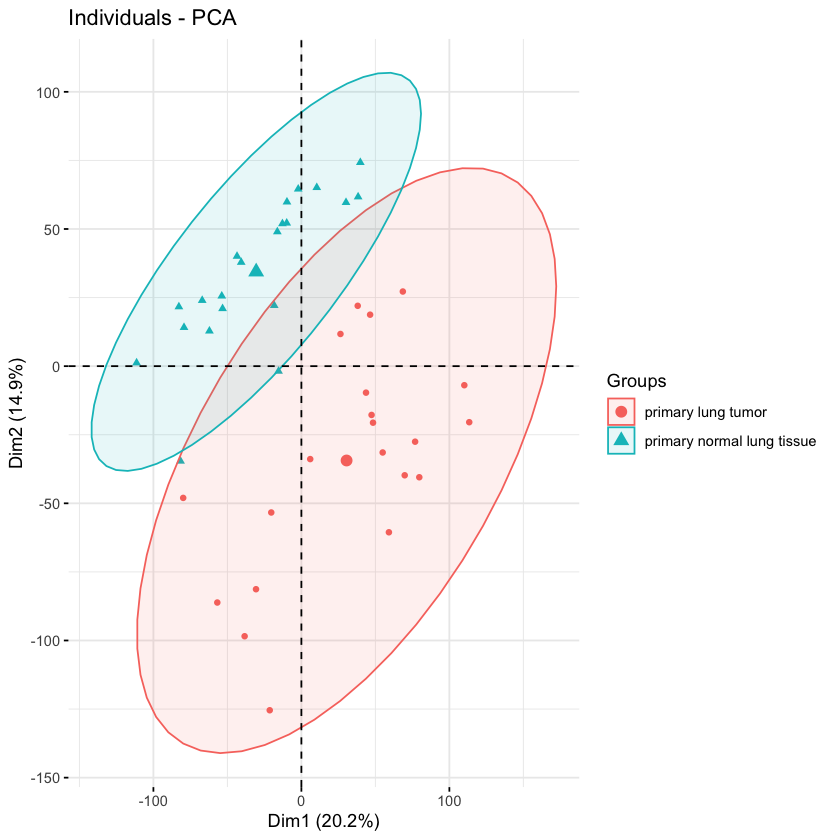

,GSM545615,GSM545616,GSM545617,GSM545618
PTCRA,-1.2307518,-0.7305122,-1.5672512,-1.3178202
C6orf117,2.0000000,-0.3492705,2.0000000,0.4826060
ASPN,-0.1142011,-1.8045290,-0.5116211,-0.6177147
SLC4A11,2.0000000,-0.9599902,0.7778212,0.9029318


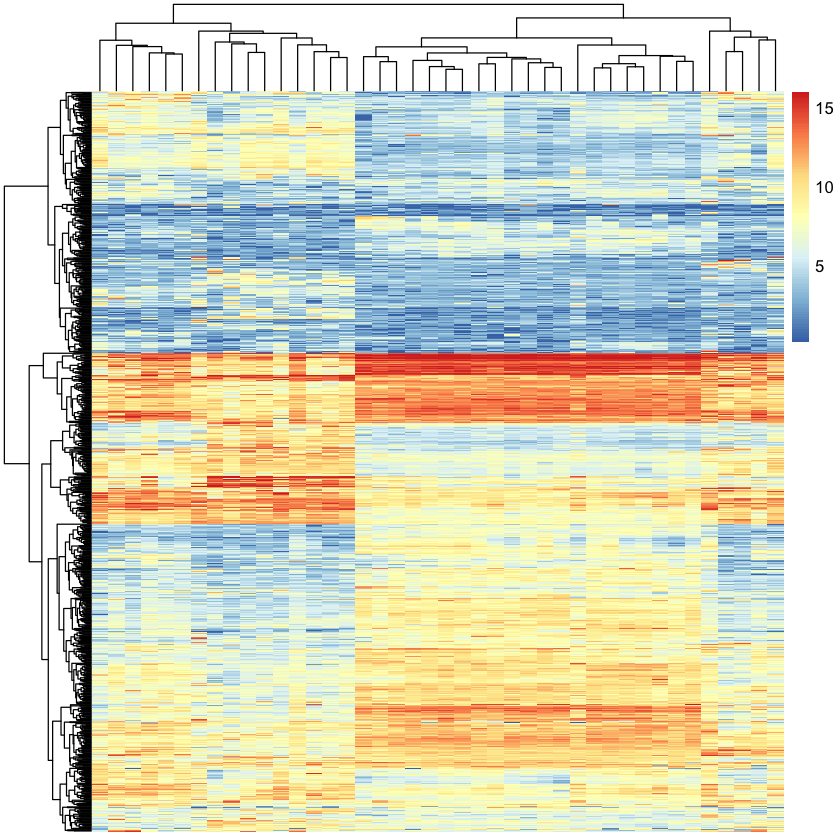

,GSM545615,GSM545616,GSM545617,GSM545618
ZZZ3,10.050644,10.053390,9.818528,9.990266
ZZEF1,8.162085,8.746074,7.656693,7.815899
ZYX,8.542686,10.998479,9.948827,9.109921
ZYG11B,7.497494,6.129774,7.586705,7.133298


[1] 15596    42

[1] 15577    42

[1] 15577    42

[1] 500  42

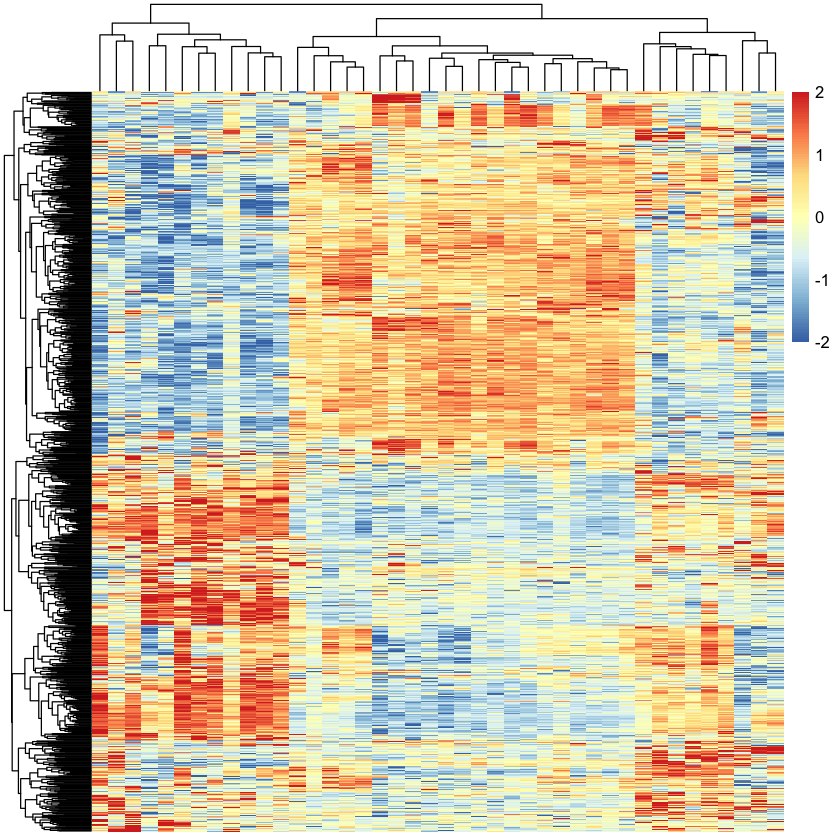

In [15]:
rm(list = ls())  ## 魔幻操作，一键清空~
options(stringsAsFactors = F)
load(file = 'step1-output.Rdata')
table(group_list)
# 每次都要检测数据
dat[1:4,1:4]
## 下面是画PCA的必须操作，需要看说明书。
dat=t(dat)#画PCA图时要求是行名时样本名，列名时探针名，因此此时需要转换
dat=as.data.frame(dat)#将matrix转换为data.frame
dat=cbind(dat,group_list) #cbind横向追加，即将分组信息追加到最后一列
library("FactoMineR")#画主成分分析图需要加载这两个包
library("factoextra") 
# The variable group_list (index = 54676) is removed
# before PCA analysis
dat.pca <- PCA(dat[,-ncol(dat)], graph = FALSE)#现在dat最后一列是group_list，需要重新赋值给一个dat.pca,这个矩阵是不含有分组信息的
fviz_pca_ind(dat.pca,
             geom.ind = "point", # show points only (nbut not "text")
             col.ind = dat$group_list, # color by groups
             # palette = c("#00AFBB", "#E7B800"),
             addEllipses = TRUE, # Concentration ellipses
             legend.title = "Groups"
)
ggsave('all_samples_PCA.png')




rm(list = ls())  ## 魔幻操作，一键清空~
load(file = 'step1-output.Rdata') #此步为一个小插曲，即计算一下从第一行开是计算每一行的sd值，知道最后一行所需要的时间
dat[1:4,1:4] 

cg=names(tail(sort(apply(dat,1,sd)),1000))#apply按行（'1'是按行取，'2'是按列取）取每一行的方差，从小到大排序，取最大的1000个
library(pheatmap)
pheatmap(dat[cg,],show_colnames =F,show_rownames = F) #对那些提取出来的1000个基因所在的每一行取出，组合起来为一个新的表达矩阵
n=t(scale(t(dat[cg,]))) # 'scale'可以对log-ratio数值进行归一化
n[n>2]=2 
n[n< -2]= -2
n[1:4,1:4]
pheatmap(n,show_colnames =F,show_rownames = F)
ac=data.frame(g=group_list)
rownames(ac)=colnames(n) #把ac的行名给到n的列名，即对每一个探针标记上分组信息（是'noTNBC'还是'TNBC'）
## 可以看到TNBC具有一定的异质性，拿它来区分乳腺癌亚型指导临床治疗还是略显粗糙。
pheatmap(n,show_colnames =F,show_rownames = F,
         annotation_col=ac,filename = 'heatmap_top1000_sd.png')


rm(list = ls()) 
load(file = 'step1-output.Rdata') 
dat[1:4,1:4] 
exprSet=dat
pheatmap::pheatmap(cor(exprSet)) 
# 组内的样本的相似性应该是要高于组间的！
colD=data.frame(group_list=group_list)
rownames(colD)=colnames(exprSet)
pheatmap::pheatmap(cor(exprSet),
                   annotation_col = colD,
                   show_rownames = F,
                   filename = 'cor_all.png')
dim(exprSet)
exprSet=exprSet[apply(exprSet,1, function(x) sum(x>1) > 5),]
dim(exprSet)

exprSet=log(edgeR::cpm(exprSet)+1)
dim(exprSet)
exprSet=exprSet[names(sort(apply(exprSet, 1,mad),decreasing = T)[1:500]),]
dim(exprSet)
M=cor(log2(exprSet+1)) 
pheatmap::pheatmap(M,annotation_col = colD)
pheatmap::pheatmap(M,
                   show_rownames = F,
                   annotation_col = colD,
                   filename = 'cor_top500.png')








## limma分析

,GSM545615,GSM545616,GSM545617,GSM545618
ZZZ3,10.051,10.053,9.819,9.990
ZZEF1,8.162,8.746,7.657,7.816
ZYX,8.543,10.998,9.949,9.110
ZYG11B,7.497,6.130,7.587,7.133


group_list
        primary lung tumor primary normal lung tissue 
                        21                         21 

pdf 
  3

[1] 15596    42

,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
FAM107A,5.964,10.780,20.50,1.586e-24,2.473e-20,45.23
RASIP1,3.793,11.789,16.91,3.506e-21,2.206e-17,37.89
TAL1,3.302,7.177,16.83,4.243e-21,2.206e-17,37.70
ANKRD47,4.089,9.524,16.68,6.032e-21,2.352e-17,37.37
CA4,5.870,6.019,16.29,1.514e-20,4.721e-17,36.48
ATOH8,3.183,5.031,15.55,9.009e-20,2.342e-16,34.75
HIGD1B,4.604,9.142,15.48,1.084e-19,2.415e-16,34.57
IL2,4.056,7.583,15.32,1.589e-19,3.098e-16,34.20
CLEC3B,4.511,7.917,15.26,1.876e-19,3.251e-16,34.04


,primary lung tumor,primary normal lung tissue
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0


,tumor,normal
GSM545615,1,0
GSM545616,1,0
GSM545617,1,0
GSM545618,1,0
GSM545619,1,0
GSM545620,1,0
GSM545621,1,0
GSM545622,1,0
GSM545623,1,0
GSM545624,1,0


,tumor-normal
tumor,1
normal,-1


,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
FAM107A,-5.964,10.780,-20.50,1.586e-24,2.473e-20,45.23
RASIP1,-3.793,11.789,-16.91,3.506e-21,2.206e-17,37.89
TAL1,-3.302,7.177,-16.83,4.243e-21,2.206e-17,37.70
ANKRD47,-4.089,9.524,-16.68,6.032e-21,2.352e-17,37.37
CA4,-5.870,6.019,-16.29,1.514e-20,4.721e-17,36.48
ATOH8,-3.183,5.031,-15.55,9.009e-20,2.342e-16,34.75


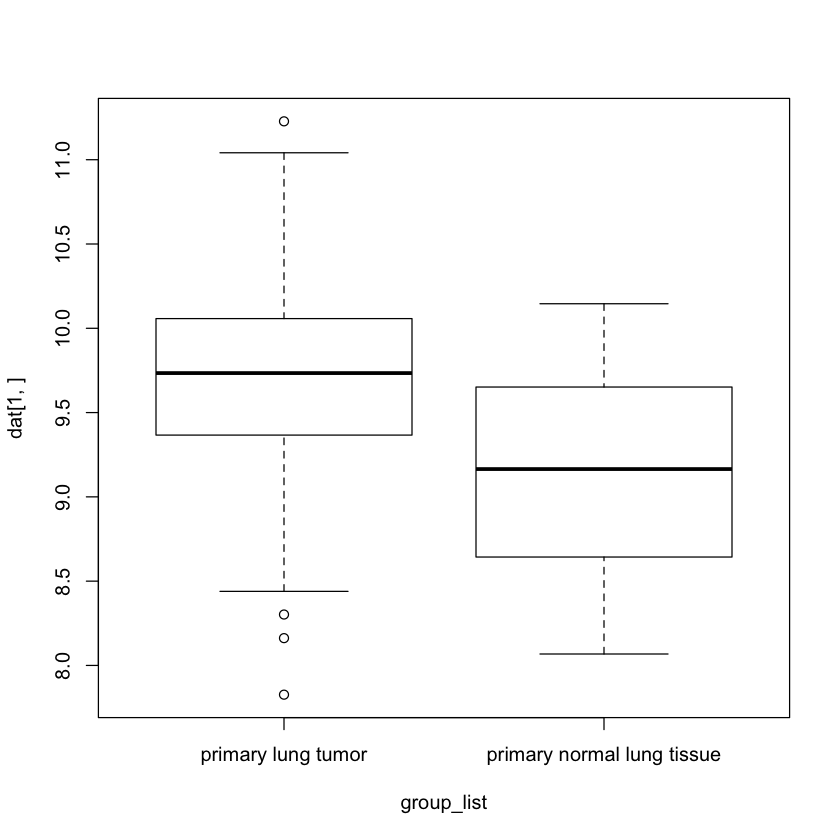

In [19]:
rm(list = ls()) 
options(stringsAsFactors = F)
load(file = 'step1-output.Rdata')
# 每次都要检测数据
dat[1:4,1:4] 
table(group_list) #table函数，查看group_list中的分组个数
#通过为每个数据集绘制箱形图，比较数据集中的数据分布
boxplot(dat[1,]~group_list) #按照group_list分组画箱线图

bp=function(g){         #定义一个函数g，函数为{}里的内容
  library(ggpubr)
  df=data.frame(gene=g,stage=group_list)
  p <- ggboxplot(df, x = "stage", y = "gene",
                 color = "stage", palette = "jco",
                 add = "jitter")
  #  Add p-value
  p + stat_compare_means()
}
dev.off()
bp(dat[1,]) ## 调用上面定义好的函数，避免同样的绘图代码重复多次敲。
bp(dat[2,])
bp(dat[3,])
bp(dat[4,])
dim(dat)

library(limma)
design=model.matrix(~factor( group_list ))
fit=lmFit(dat,design)
fit=eBayes(fit)
## 上面是limma包用法的一种方式 
options(digits = 4) #设置全局的数字有效位数为4
#topTable(fit,coef=2,adjust='BH') 
topTable(fit,coef=2,adjust='BH') 
## 但是上面的用法做不到随心所欲的指定任意两组进行比较

design <- model.matrix(~0+factor(group_list))
colnames(design)=levels(factor(group_list))
head(design)
exprSet=dat
rownames(design)=colnames(exprSet)
colnames(design)=c('tumor','normal')
design
contrast.matrix<-makeContrasts("tumor-normal",
                               levels = design)
contrast.matrix ##这个矩阵声明，我们要把 Tumor 组跟 Normal 进行差异分析比较

deg = function(exprSet,design,contrast.matrix){
  ##step1
  fit <- lmFit(exprSet,design)
  ##step2
  fit2 <- contrasts.fit(fit, contrast.matrix) 
  ##这一步很重要，大家可以自行看看效果
  
  fit2 <- eBayes(fit2)  ## default no trend !!!
  ##eBayes() with trend=TRUE
  ##step3
  tempOutput = topTable(fit2, coef=1, n=Inf)
  nrDEG = na.omit(tempOutput) 
  #write.csv(nrDEG2,"limma_notrend.results.csv",quote = F)
  head(nrDEG)
  return(nrDEG)
}

deg = deg(exprSet,design,contrast.matrix)

head(deg)

save(deg,file = 'deg.Rdata')

,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
FAM107A,-5.964,10.780,-20.50,1.586e-24,2.473e-20,45.23
RASIP1,-3.793,11.789,-16.91,3.506e-21,2.206e-17,37.89
TAL1,-3.302,7.177,-16.83,4.243e-21,2.206e-17,37.70
ANKRD47,-4.089,9.524,-16.68,6.032e-21,2.352e-17,37.37
CA4,-5.870,6.019,-16.29,1.514e-20,4.721e-17,36.48
ATOH8,-3.183,5.031,-15.55,9.009e-20,2.342e-16,34.75


The following objects are masked from nrDEG (pos = 3):

    adj.P.Val, AveExpr, B, logFC, P.Value, t


Saving 7 x 7 in image

Saving 7 x 7 in image



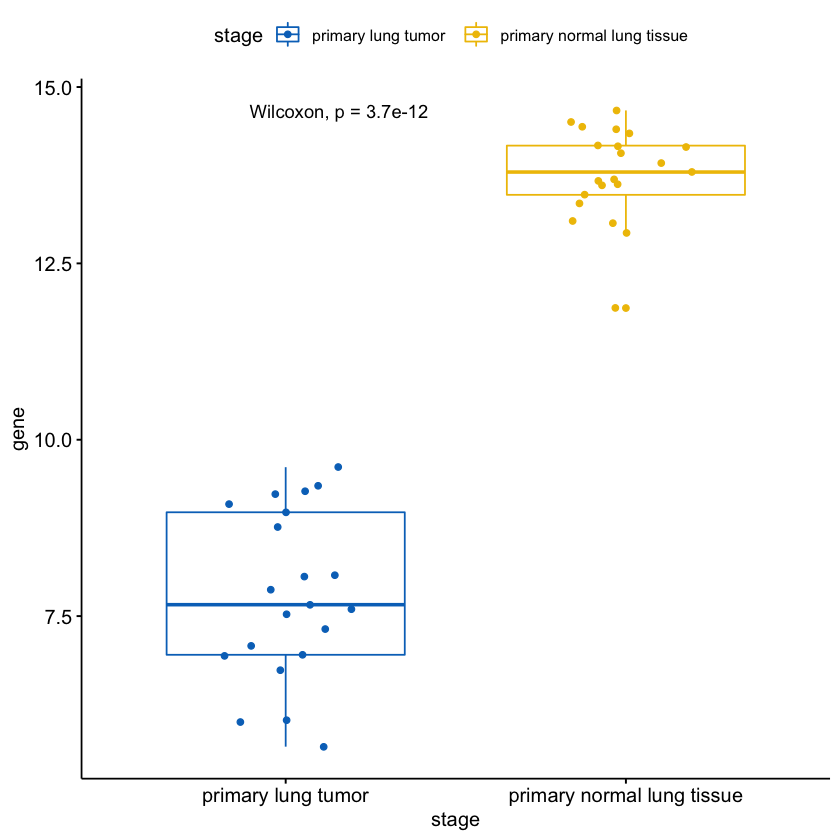

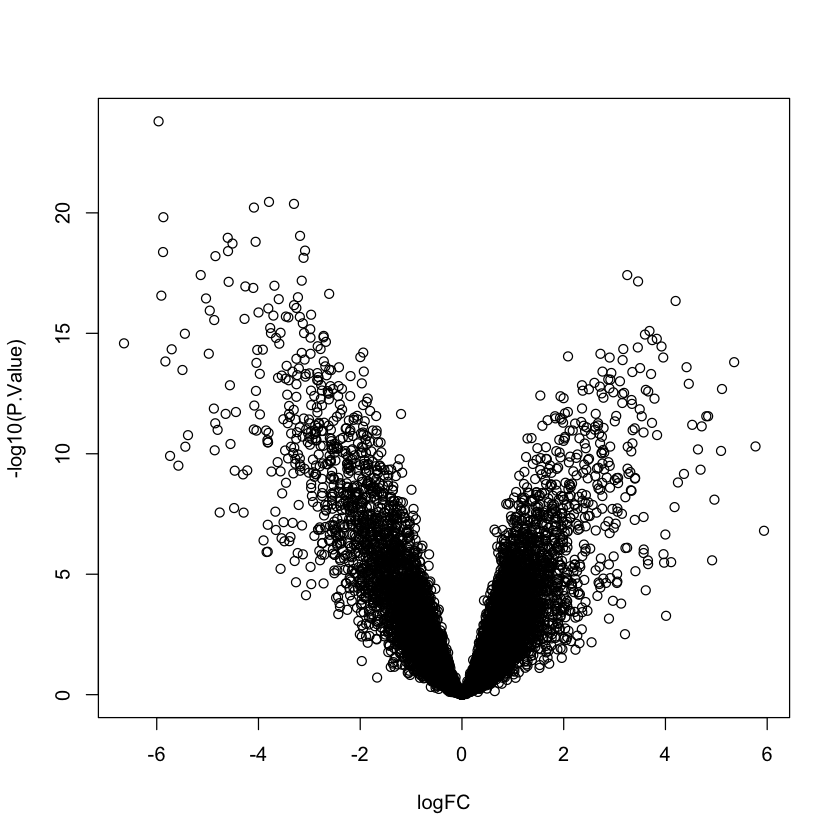

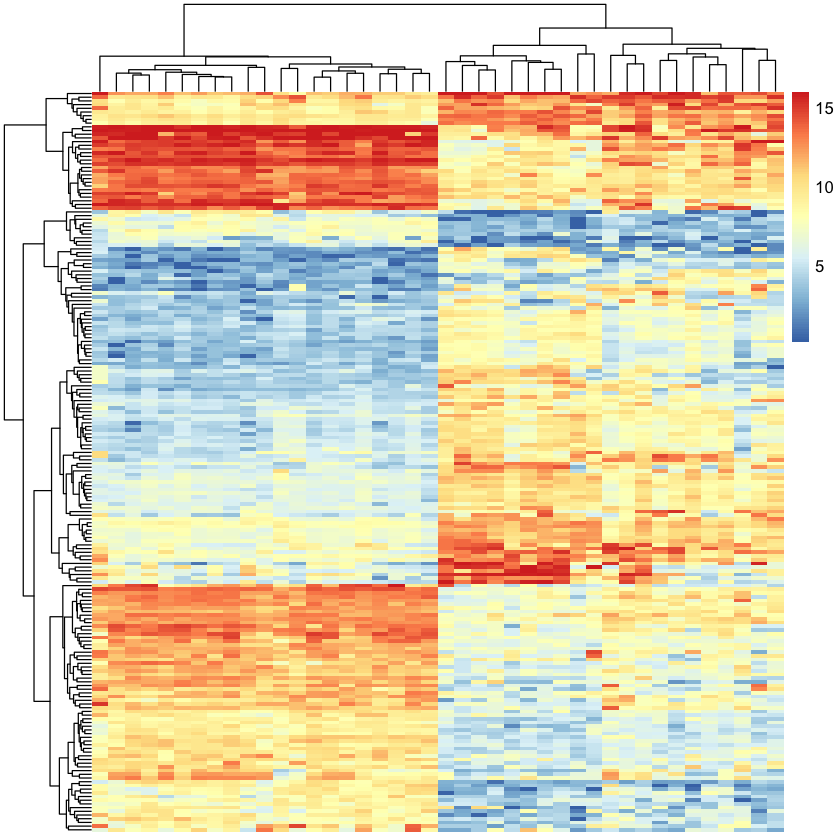

In [20]:
load(file = 'deg.Rdata')
head(deg)
bp(dat[rownames(deg)[1],])
## for volcano 
if(T){
  nrDEG=deg
  head(nrDEG)
  attach(nrDEG)
  plot(logFC,-log10(P.Value))
  library(ggpubr)
  df=nrDEG
  df$v= -log10(P.Value) #df新增加一列'v',值为-log10(P.Value)
  ggscatter(df, x = "logFC", y = "v",size=0.5)
  
  df$g=ifelse(df$P.Value>0.01,'stable', #if 判断：如果这一基因的P.Value>0.01，则为stable基因
              ifelse( df$logFC >2,'up', #接上句else 否则：接下来开始判断那些P.Value<0.01的基因，再if 判断：如果logFC >1.5,则为up（上调）基因
                      ifelse( df$logFC < -2,'down','stable') )#接上句else 否则：接下来开始判断那些logFC <1.5 的基因，再if 判断：如果logFC <1.5，则为down（下调）基因，否则为stable基因
  )
  table(df$g)
  df$name=rownames(df)
  head(df)
  ggscatter(df, x = "logFC", y = "v",size=0.5,color = 'g')
  ggscatter(df, x = "logFC", y = "v", color = "g",size = 0.5,
            label = "name", repel = T,
            #label.select = rownames(df)[df$g != 'stable'] ,
            label.select = c('TTC9', 'AQP3', 'CXCL11','PTGS2'), #挑选一些基因在图中显示出来
            palette = c("#00AFBB", "#E7B800", "#FC4E07") )
  ggsave('volcano.png')
  
  ggscatter(df, x = "AveExpr", y = "logFC",size = 0.2)
  df$p_c = ifelse(df$P.Value<0.001,'p<0.001',
                  ifelse(df$P.Value<0.01,'0.001<p<0.01','p>0.01'))
  table(df$p_c )
  ggscatter(df,x = "AveExpr", y = "logFC", color = "p_c",size=0.2, 
            palette = c("green", "red", "black") )
  ggsave('MA.png')
  
  
}

## for heatmap 
if(T){ 
  load(file = 'step1-output.Rdata')
  # 每次都要检测数据
  dat[1:4,1:4]
  table(group_list)
  x=deg$logFC #deg取logFC这列并将其重新赋值给x
  names(x)=rownames(deg) #deg取probe_id这列，并将其作为名字给x
  cg=c(names(head(sort(x),100)),#对x进行从小到大排列，取前100及后100，并取其对应的探针名，作为向量赋值给cg
       names(tail(sort(x),100)))
  library(pheatmap)
  pheatmap(dat[cg,],show_colnames =F,show_rownames = F) #对dat按照cg取行，所得到的矩阵来画热图
  n=t(scale(t(dat[cg,])))#通过“scale”对log-ratio数值进行归一化，现在的dat是行名为探针，列名为样本名，由于scale这个函数应用在不同组数据间存在差异时，需要行名为样本，因此需要用t(dat[cg,])来转换，最后再转换回来
  
  n[n>2]=2
  n[n< -2]= -2
  n[1:4,1:4]
  pheatmap(n,show_colnames =F,show_rownames = F)
  ac=data.frame(g=group_list)
  rownames(ac)=colnames(n) #将ac的行名也就分组信息（是‘no TNBC’还是‘TNBC’）给到n的列名，即热图中位于上方的分组信息
  pheatmap(n,show_colnames =F,
           show_rownames = F,
          cluster_cols = F, 
           annotation_col=ac,filename = 'heatmap_top200_DEG.png') #列名注释信息为ac即分组信息
  
  
}

write.csv(deg,file = 'deg.csv')



## sept4

,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
FAM107A,-5.964,10.780,-20.50,1.586e-24,2.473e-20,45.23
RASIP1,-3.793,11.789,-16.91,3.506e-21,2.206e-17,37.89
TAL1,-3.302,7.177,-16.83,4.243e-21,2.206e-17,37.70
ANKRD47,-4.089,9.524,-16.68,6.032e-21,2.352e-17,37.37
CA4,-5.870,6.019,-16.29,1.514e-20,4.721e-17,36.48
ATOH8,-3.183,5.031,-15.55,9.009e-20,2.342e-16,34.75



  DOWN stable     UP 
   882  14111    603 

,logFC,AveExpr,t,P.Value,adj.P.Val,B,g
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
FAM107A,-5.964,10.780,-20.50,1.586e-24,2.473e-20,45.23,DOWN
RASIP1,-3.793,11.789,-16.91,3.506e-21,2.206e-17,37.89,DOWN
TAL1,-3.302,7.177,-16.83,4.243e-21,2.206e-17,37.70,DOWN
ANKRD47,-4.089,9.524,-16.68,6.032e-21,2.352e-17,37.37,DOWN
CA4,-5.870,6.019,-16.29,1.514e-20,4.721e-17,36.48,DOWN
ATOH8,-3.183,5.031,-15.55,9.009e-20,2.342e-16,34.75,DOWN


'select()' returned 1:many mapping between keys and columns

Warning message in bitr(unique(deg$symbol), fromType = "SYMBOL", toType = c("ENTREZID"), :
“14.44% of input gene IDs are fail to map...”


,SYMBOL,ENTREZID
,<chr>,<chr>
1,FAM107A,11170
2,RASIP1,54922
3,TAL1,6886
5,CA4,762
6,ATOH8,84913
7,HIGD1B,51751


,logFC,AveExpr,t,P.Value,adj.P.Val,B,g,symbol
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
FAM107A,-5.964,10.780,-20.50,1.586e-24,2.473e-20,45.23,DOWN,FAM107A
RASIP1,-3.793,11.789,-16.91,3.506e-21,2.206e-17,37.89,DOWN,RASIP1
TAL1,-3.302,7.177,-16.83,4.243e-21,2.206e-17,37.70,DOWN,TAL1
ANKRD47,-4.089,9.524,-16.68,6.032e-21,2.352e-17,37.37,DOWN,ANKRD47
CA4,-5.870,6.019,-16.29,1.514e-20,4.721e-17,36.48,DOWN,CA4
ATOH8,-3.183,5.031,-15.55,9.009e-20,2.342e-16,34.75,DOWN,ATOH8


,symbol,logFC,AveExpr,t,P.Value,adj.P.Val,B,g,ENTREZID
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,A1BG,-0.1003,5.929,-0.5094,0.6129782,0.727204,-6.8868,stable,1
2,A2M,-0.6880,4.765,-3.0581,0.0037341,0.013388,-2.7112,stable,2
3,A2ML1,0.8162,4.285,1.8267,0.0743523,0.152378,-5.3861,stable,144568
4,A4GALT,0.1976,10.838,0.6338,0.5293716,0.658012,-6.8152,stable,53947
5,A4GNT,-0.6136,4.644,-3.4994,0.0010595,0.004666,-1.5286,stable,51146
6,AAAS,0.5365,8.544,3.8768,0.0003398,0.001803,-0.4465,stable,8086


4312  8318 10874 55143 55388   991 
4.573 4.515 4.418 4.144 3.876 3.678

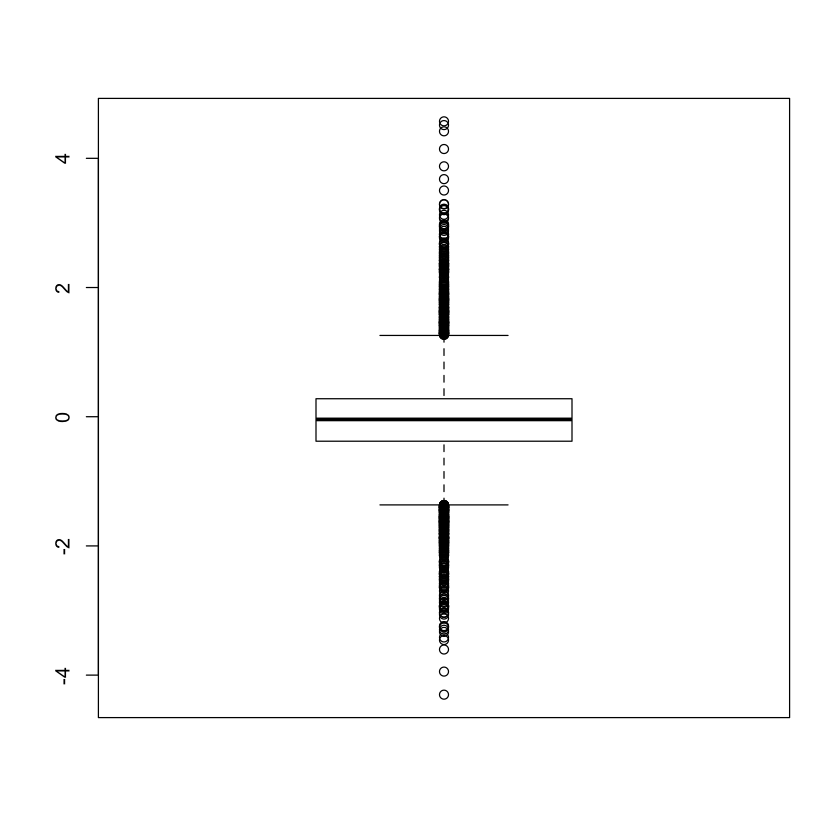

Saving 7 x 7 in image



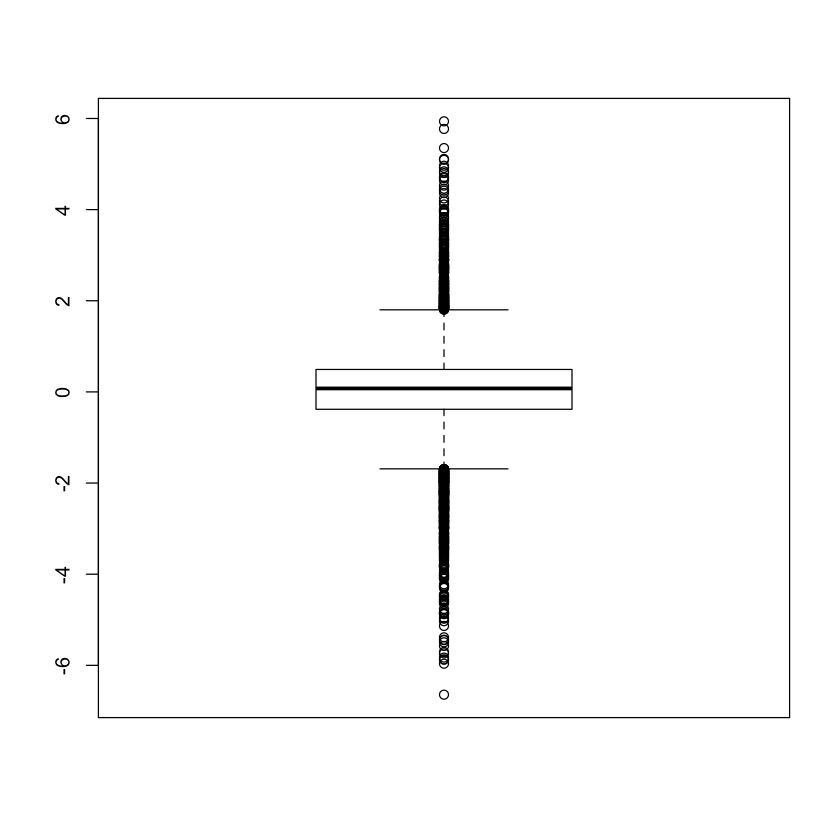

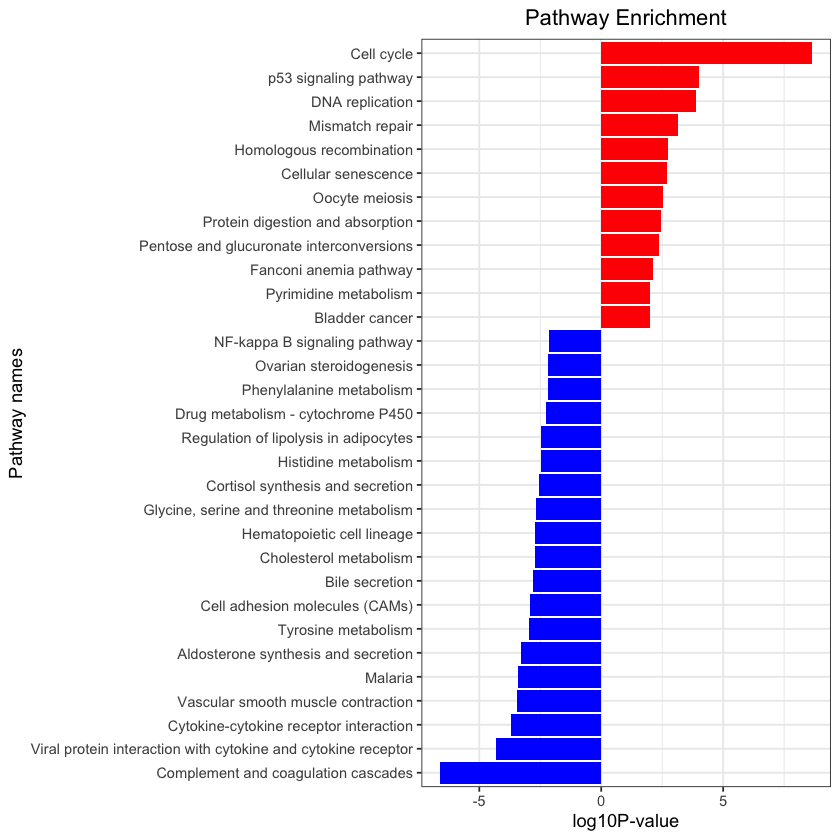

Saving 7 x 7 in image



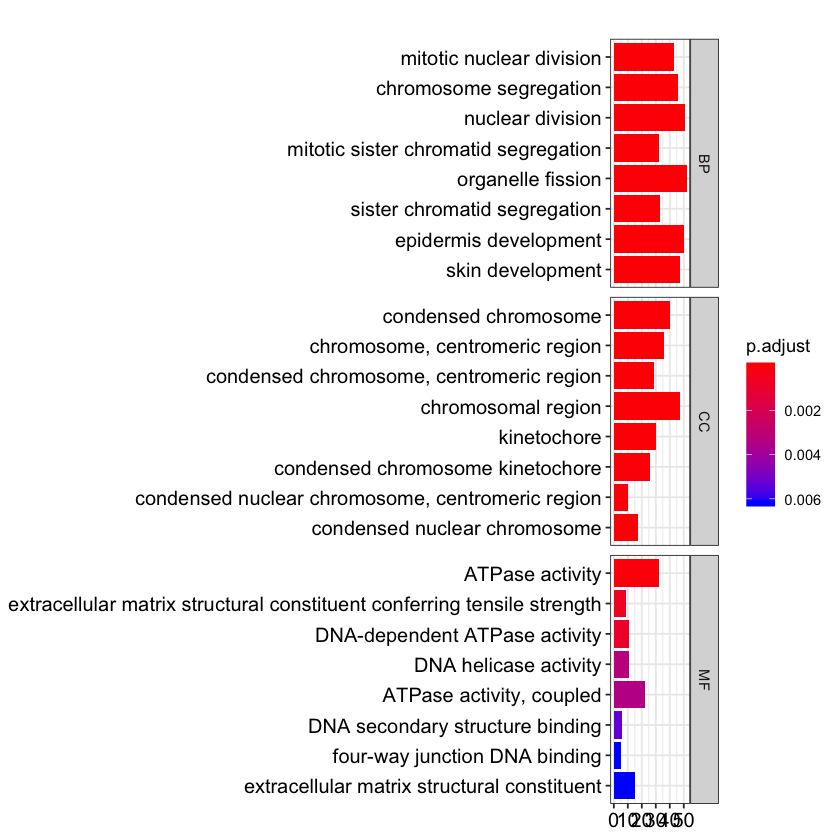

Saving 7 x 7 in image



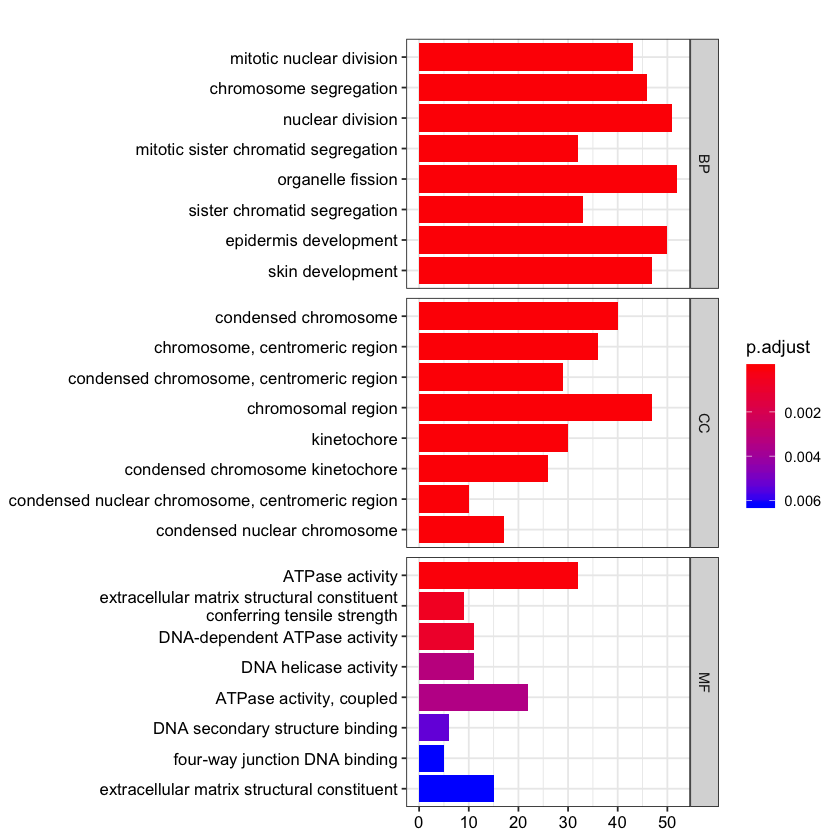

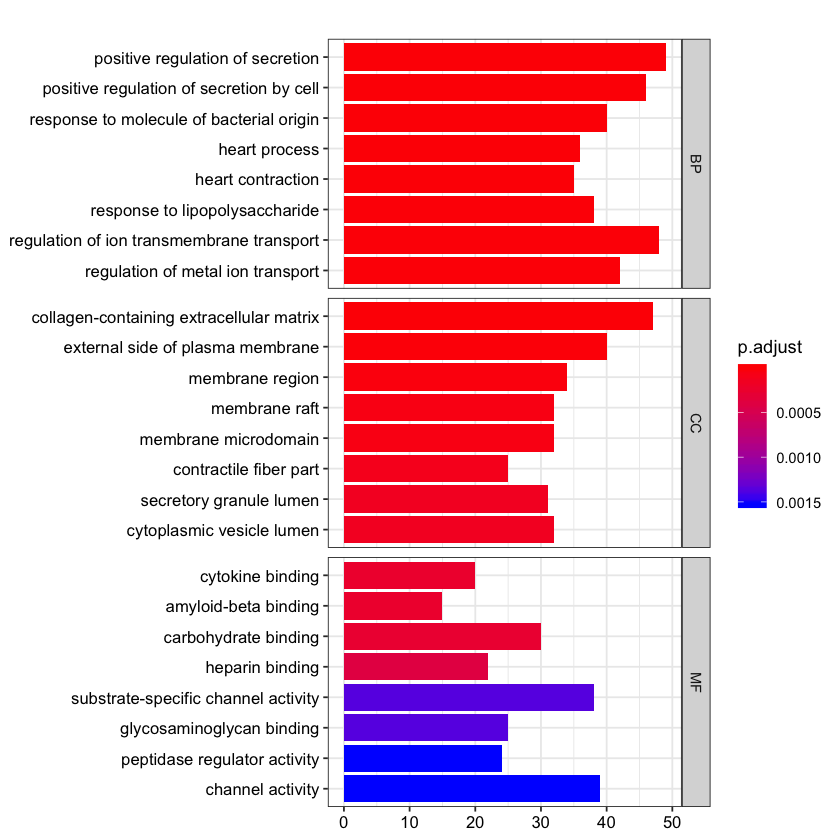

In [21]:
rm(list = ls()) 
options(stringsAsFactors = F)

load(file = 'deg.Rdata')
head(deg)
## 不同的阈值，筛选到的差异基因数量就不一样，后面的超几何分布检验结果就大相径庭。
logFC_t=1.5
deg$g=ifelse(deg$P.Value>0.05,'stable',
            ifelse( deg$logFC > logFC_t,'UP',
                    ifelse( deg$logFC < -logFC_t,'DOWN','stable') )
)
table(deg$g)
head(deg)
deg$symbol=rownames(deg)
library(ggplot2)
library(clusterProfiler)
library(org.Hs.eg.db)
df <- bitr(unique(deg$symbol), fromType = "SYMBOL",
           toType = c( "ENTREZID"),
           OrgDb = org.Hs.eg.db)
head(df)
DEG=deg
head(DEG)

DEG=merge(DEG,df,by.y='SYMBOL',by.x='symbol')
head(DEG)
save(DEG,file = 'anno_DEG.Rdata')


gene_up= DEG[DEG$g == 'UP','ENTREZID'] 
gene_down=DEG[DEG$g == 'DOWN','ENTREZID'] 
gene_diff=c(gene_up,gene_down)
gene_all=as.character(DEG[ ,'ENTREZID'] )
data(geneList, package="DOSE")
head(geneList)
boxplot(geneList)
boxplot(DEG$logFC)

geneList=DEG$logFC
names(geneList)=DEG$ENTREZID
geneList=sort(geneList,decreasing = T)

source('kegg_and_go_up_and_down.R')
run_kegg(gene_up,gene_down,pro='npc_VS_normal')
# 需要多go数据库的3个条目进行3次富集分析，非常耗时。
# run_go(gene_up,gene_down,pro='npc_VS_normal')

go <- enrichGO(gene_up, OrgDb = "org.Hs.eg.db", ont="all") 
library(ggplot2)
library(stringr)
barplot(go, split="ONTOLOGY")+ facet_grid(ONTOLOGY~., scale="free") 
barplot(go, split="ONTOLOGY",font.size =10)+ 
  facet_grid(ONTOLOGY~., scale="free") + 
  scale_x_discrete(labels=function(x) str_wrap(x, width=50))+
  ggsave('gene_up_GO_all_barplot.png') 
go <- enrichGO(gene_down, OrgDb = "org.Hs.eg.db", ont="all") 
barplot(go, split="ONTOLOGY",font.size =10)+ 
  facet_grid(ONTOLOGY~., scale="free") + 
  scale_x_discrete(labels=function(x) str_wrap(x, width=50))+
  ggsave('gene_down_GO_all_barplot.png')




## sept 5

,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
FAM107A,-5.964,10.780,-20.50,1.586e-24,2.473e-20,45.23
RASIP1,-3.793,11.789,-16.91,3.506e-21,2.206e-17,37.89
TAL1,-3.302,7.177,-16.83,4.243e-21,2.206e-17,37.70
ANKRD47,-4.089,9.524,-16.68,6.032e-21,2.352e-17,37.37
CA4,-5.870,6.019,-16.29,1.514e-20,4.721e-17,36.48
ATOH8,-3.183,5.031,-15.55,9.009e-20,2.342e-16,34.75


4312  8318 10874 55143 55388   991 
4.573 4.515 4.418 4.144 3.876 3.678

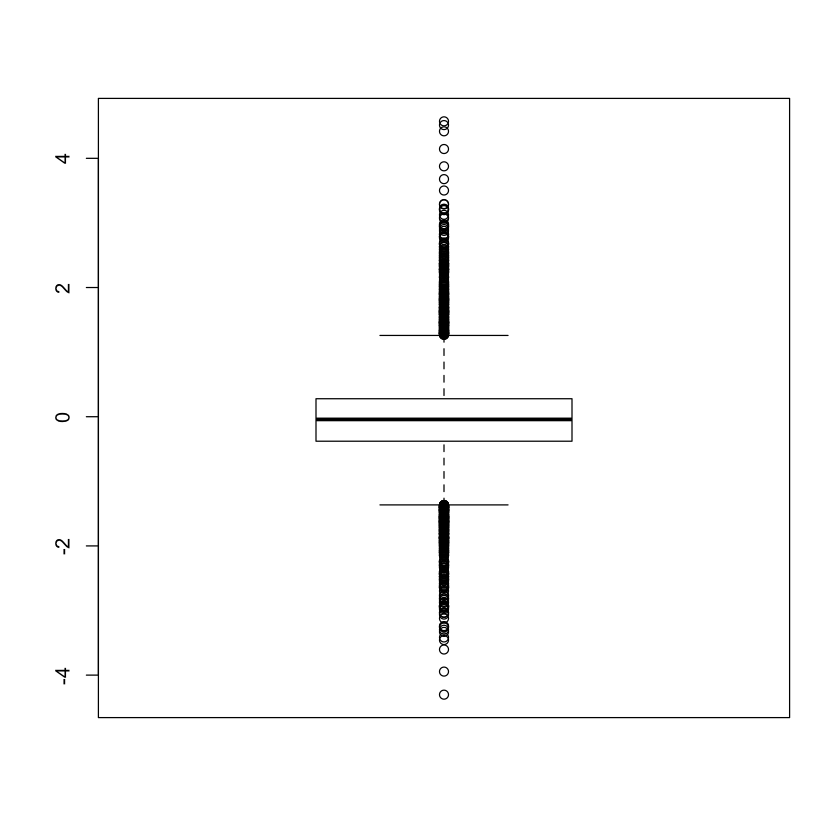

[1] "9625"      "21"        "23460"     "10351"     "5243"      "150000"   
  [7] "25890"     "22885"     "33"        "54"        "84519"     "81616"    
 [13] "72"        "94"        "9510"      "170690"    "11095"     "9719"     
 [19] "57188"     "104"       "196883"    "111"       "124"       "126"      
 [25] "141"       "154"       "134265"    "155465"    "181"       "185"      
 [31] "64902"     "203"       "9590"      "212"       "8854"      "221"      
 [37] "247"       "241"       "249"       "259173"    "154810"    "275"      
 [43] "284"       "253935"    "27063"     "147463"    "306"       "8639"     
 [49] "316"       "322"       "335"       "403314"    "341"       "350"      
 [55] "81575"     "360"       "361"       "366"       "23237"     "9411"     
 [61] "257106"    "393"       "395"       "22899"     "9828"      "9459"     
 [67] "219681"    "140458"    "443"       "467"       "84913"     "477"      
 [73] "482"       "23545"     "51761"     "590"       "597"       "55859"    
 [79] "51411"     "55909"     "650"       "695"       "79908"     "153579"   
 [85] "29125"     "56967"     "283897"    "79098"     "128346"    "127003"   
 [91] "712"       "713"       "114898"    "114900"    "128602"    "718"      
 [97] "722"       "153571"    "168090"    "730"       "732"       "84688"    
[103] "762"       "81617"     "8912"      "9254"      "782"       "23705"    
[109] "55450"     "825"       "10753"     "828"       "22900"     "64170"    
[115] "57513"     "844"       "845"       "117144"    "857"       "859"      
[121] "863"       "23492"     "85478"     "114800"    "6360"      "6361"     
[127] "6366"      "6348"      "9560"      "1230"      "9034"      "911"      
[133] "933"       "51744"     "10871"     "146722"    "9936"      "945"      
[139] "948"       "951"       "1043"      "9308"      "22918"     "10435"    
[145] "28513"     "64072"     "1003"      "8999"      "6792"      "1036"     
[151] "1071"      "1675"      "5199"      "1080"      "84952"     "9023"     
[157] "1117"      "27159"     "91851"     "5010"      "51208"     "7122"     
[163] "10462"     "387837"    "161198"    "51267"     "51266"     "7123"     
[169] "283420"    "9022"      "53405"     "146225"    "1264"      "27255"    
[175] "1305"      "1285"      "84940"     "84701"     "1346"      "27151"    
[181] "1361"      "1368"      "1397"      "7180"      "83716"     "55118"    
[187] "56253"     "1408"      "1440"      "1441"      "1473"      "1509"     
[193] "1510"      "1512"      "8452"      "1524"      "124936"    "1536"     
[199] "79901"     "1583"      "1543"      "1593"      "1577"      "1580"     
[205] "199974"    "116159"    "23500"     "1602"      "1612"      "8642"     
[211] "55510"     "27147"     "22898"     "1674"      "84976"     "85458"    
[217] "10395"     "9940"      "1755"      "1770"      "27019"     "55192"    
[223] "1776"      "58511"     "220164"    "285489"    "1805"      "1808"     
[229] "53905"     "90527"     "1843"      "78986"     "1850"      "83657"    
[235] "64641"     "79746"     "1906"      "1910"      "79645"     "2202"     
[241] "151651"    "51162"     "10938"     "1977"      "51705"     "2013"     
[247] "2014"      "2022"      "90952"     "2159"      "2160"      "2167"     
[253] "3995"      "11170"     "54757"     "339145"    "10516"     "2203"     
[259] "26260"     "2205"      "2219"      "8547"      "343413"    "89846"    
[265] "152273"    "2254"      "2264"      "2266"      "2268"      "2273"     
[271] "9457"      "344018"    "27145"     "2318"      "23767"     "55640"    
[277] "2327"      "2348"      "2352"      "2353"      "2354"      "3170"     
[283] "2294"      "10129"     "10272"     "53826"     "53822"     "8322"     
[289] "7855"      "9846"      "4616"      "2621"      "2624"      "2627"     
[295] "2644"      "2662"      "54438"     "2674"      "170575"    "55340"    
[301] "474344"    "168537"    "155038"    "54810"     "2701"      "200504"   
[307] "342035"    "9535"

[1] "26154"  "154664" "10058"  "10057"  "86"     "8038"   "27299"  "131"   
  [9] "57016"  "1646"   "5832"   "218"    "242"    "118932" "54443"  "81611" 
 [17] "11199"  "339"    "9824"   "23204"  "56938"  "9048"   "92591"  "259266"
 [25] "29028"  "79915"  "23120"  "79572"  "488"    "495"    "6790"   "9212"  
 [33] "51582"  "148789" "10331"  "8702"   "55971"  "56033"  "10409"  "53335" 
 [41] "10017"  "622"    "10282"  "638"    "332"    "641"    "655"    "646"   
 [49] "672"    "121551" "699"    "701"    "9184"   "387695" "115749" "56913" 
 [57] "55732"  "148304" "375444" "768"    "774"    "793"    "810"    "51806" 
 [65] "8573"   "57524"  "23624"  "84733"  "890"    "891"    "9133"   "898"   
 [73] "990"    "157313" "55038"  "113130" "83879"  "55143"  "999"    "1000"  
 [81] "1001"   "1033"   "81620"  "1048"   "1087"   "1058"   "1062"   "1063"  
 [89] "64946"  "2491"   "55839"  "79172"  "55165"  "79959"  "10669"  "8208"  
 [97] "1111"   "1114"   "140578" "1138"   "8973"   "1163"   "9635"   "9071"  
[105] "49861"  "84518"  "29097"  "26507"  "26047"  "1690"   "8161"   "1300"  
[113] "1301"   "1308"   "1277"   "255631" "1281"   "1289"   "1290"   "1294"  
[121] "170712" "1356"   "1382"   "1469"   "1470"   "115908" "10563"  "9547"  
[129] "1591"   "57834"  "4051"   "55157"  "1633"   "54165"  "55789"  "91614" 
[137] "91319"  "22943"  "1749"   "1750"   "56521"  "29980"  "165545" "1824"  
[145] "1825"   "1830"   "1832"   "51514"  "1852"   "1870"   "79733"  "1917"  
[153] "1944"   "1956"   "112399" "5610"   "1978"   "54821"  "9700"   "55224" 
[161] "9156"   "2139"   "2146"   "2161"   "2150"   "2151"   "222584" "81610" 
[169] "55215"  "2191"   "79072"  "2201"   "2237"   "2244"   "55785"  "9982"  
[177] "2267"   "63979"  "2312"   "116123" "84624"  "3171"   "2304"   "2305"  
[185] "2444"   "6624"   "2530"   "55879"  "51083"  "79623"  "51809"  "163351"
[193] "2730"   "9245"   "2668"   "2673"   "8836"   "51659"  "64785"  "84296" 
[201] "2706"   "2709"   "10804"  "219970" "64395"  "51053"  "2786"   "2792"  
[209] "51280"  "2842"   "2861"   "53836"  "84706"  "2877"   "26585"  "79977" 
[217] "145258" "55127"  "3070"   "55502"  "6596"   "3148"   "3161"   "3198"  
[225] "3207"   "3219"   "3226"   "3229"   "3224"   "3236"   "3237"   "3251"  
[233] "84343"  "90161"  "3359"   "22858"  "10642"  "3486"   "388555" "57549" 
[241] "29949"  "58985"  "51561"  "3608"   "25896"  "128239" "3664"   "50805" 
[249] "22801"  "3696"   "3706"   "3747"   "3751"   "3755"   "3775"   "284252"
[257] "11014"  "3832"   "9928"   "56992"  "81930"  "10112"  "55605"  "9493"  
[265] "11004"  "24137"  "90293"  "5653"   "11202"  "9735"   "3860"   "3861"  
[273] "3866"   "3868"   "25984"  "3852"   "3853"   "3854"   "121391" "144501"
[281] "3892"   "51176"  "55366"  "9355"   "4001"   "4015"   "121227" "29967" 
[289] "8581"   "27076"  "10434"  "4104"   "79694"  "5597"   "65108"  "92935" 
[297] "22983"  "4151"   "55388"  "4171"   "4173"   "84515"  "4192"   "4199"  
[305] "116931" "9833"   "145873" "55669"  "145282" "4288"   "4312"   "4319"  
[313] "4321"   "4322"   "4323"   "4314"   "4318"   "51678"  "9801"   "11222" 
[321] "4436"   "2956"   "124540" "4477"   "9650"   "10797"  "4605"   "339983"
[329] "9918"   "54892"  "23397"  "10403"  "4751"   "81832"  "81831"  "4784"  
[337] "25791"  "4821"   "644524" "4831"   "4862"   "10360"  "190"    "4922"  
[345] "55190"  "83540"  "57122"  "79023"  "54830"  "51203"  "132299" "55753" 
[353] "11339"  "4986"   "79339"  "5017"   "5050"   "5053"   "5058"   "56924" 
[361] "5080"   "5083"   "55872"  "5099"   "5111"   "9601"   "5163"   "64065" 
[369] "5203"   "5217"   "5307"   "5308"   "9088"   "5328"   "26499"  "55200" 
[377] "5347"   "10733"  "5352"   "79983"  "5427"   "5433"   "10631"  "54866" 
[385] "9055"   "5565"   "5591"   "10196"  "150696" "55771"  "51450"  "56952" 
[393] "29968"  "23198"  "5738"   "5803"   "5831"   "5888"   "25788"  "8438"  
[401] "55103"  "51195"  "8437"   "5928"   "283248" "5984"   "26575"  "9699"  
[409] "80010"  "10535"  

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
hsa04110,hsa04110,Cell cycle,20/259,124/8011,2.220e-09,5.660e-07
hsa04115,hsa04115,p53 signaling pathway,10/259,72/8011,9.602e-05,1.081e-02
hsa03030,hsa03030,DNA replication,7/259,36/8011,1.272e-04,1.081e-02
hsa03430,hsa03430,Mismatch repair,5/259,23/8011,7.088e-04,4.518e-02
hsa03440,hsa03440,Homologous recombination,6/259,41/8011,1.872e-03,8.432e-02
hsa04218,hsa04218,Cellular senescence,13/259,160/8011,1.984e-03,8.432e-02


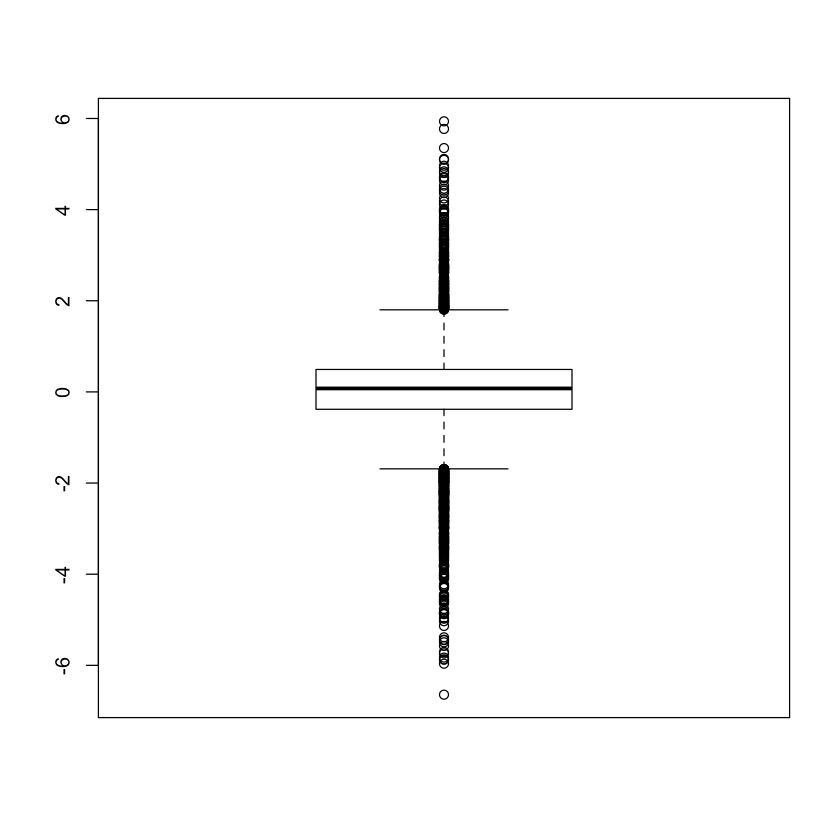

#
# over-representation test
#
#...@organism 	 hsa 
#...@ontology 	 KEGG 
#...@keytype 	 ENTREZID 
#...@gene 	 chr [1:534] "26154" "154664" "10058" "10057" "86" "8038" "27299" "131" ...
#...pvalues adjusted by 'BH' with cutoff <0.1 
#...6 enriched terms found
'data.frame':	6 obs. of  9 variables:
 $ ID         : chr  "hsa04110" "hsa04115" "hsa03030" "hsa03430" ...
 $ Description: chr  "Cell cycle" "p53 signaling pathway" "DNA replication" "Mismatch repair" ...
 $ GeneRatio  : chr  "20/259" "10/259" "7/259" "5/259" ...
 $ BgRatio    : chr  "124/8011" "72/8011" "36/8011" "23/8011" ...
 $ pvalue     : num  2.22e-09 9.60e-05 1.27e-04 7.09e-04 1.87e-03 ...
 $ p.adjust   : num  5.66e-07 1.08e-02 1.08e-02 4.52e-02 8.43e-02 ...
 $ qvalue     : num  5.49e-07 1.05e-02 1.05e-02 4.38e-02 8.18e-02 ...
 $ geneID     : chr  "BUB1/BUB1B/BUB3/CCNA2/CCNB1/CCNB2/CCNE1/CDC6/CHEK1/E2F2/ESPL1/MCM2/MCM4/PCNA/PKMYT1/PLK1/PRKDC/SFN/SKP2/YWHAZ" "CCNB1/CCNB2/CCNE1/CHEK1/IGFBP3/PERP/RRM2/SERPINB5/SESN3/SFN" "FEN1

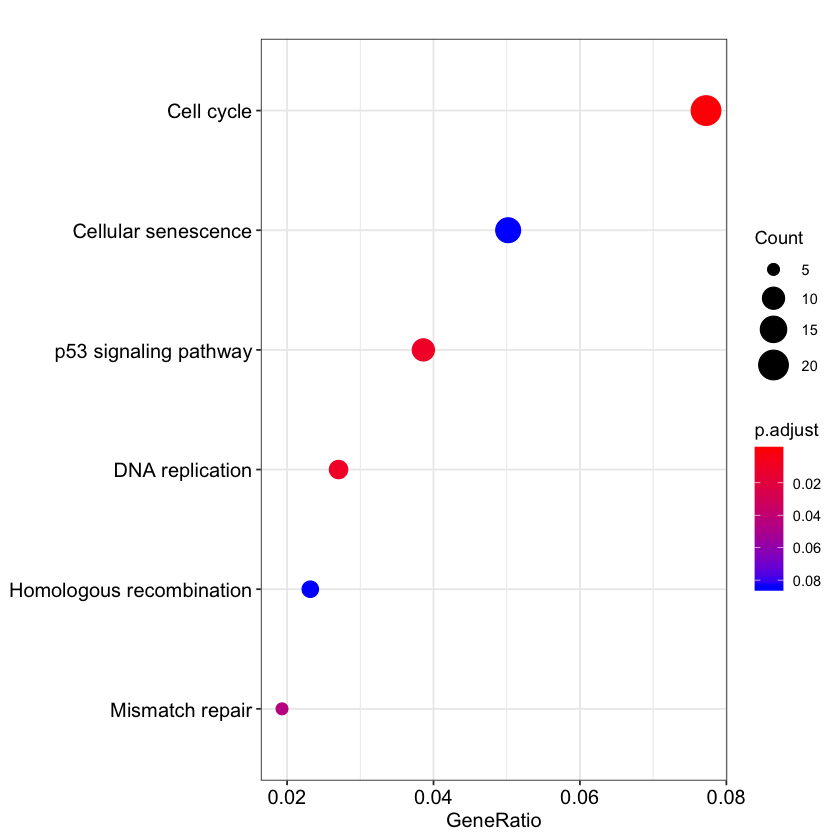

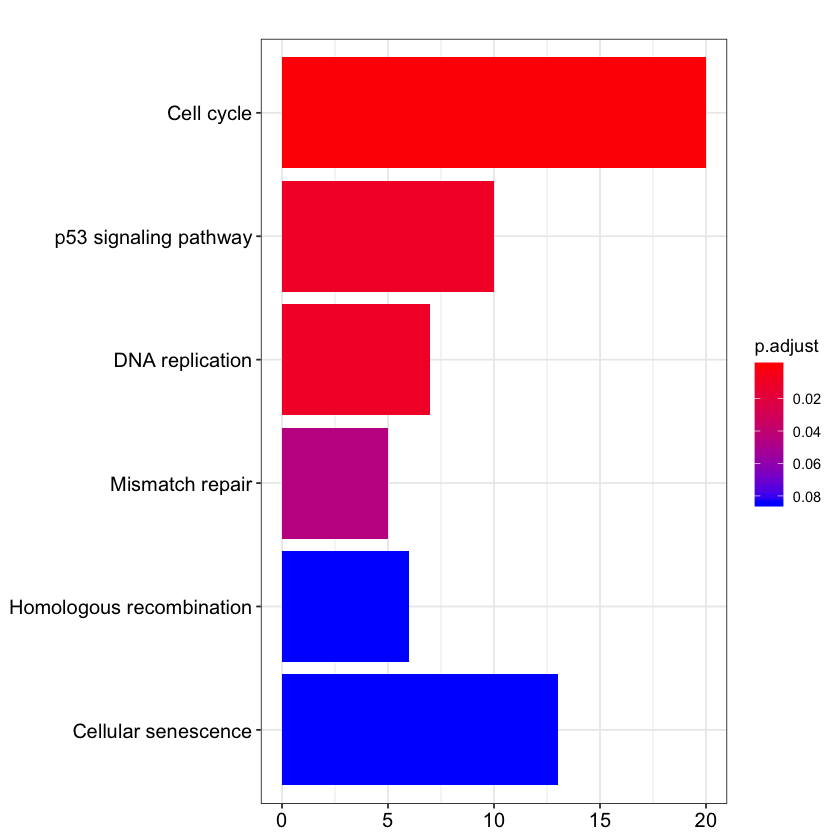

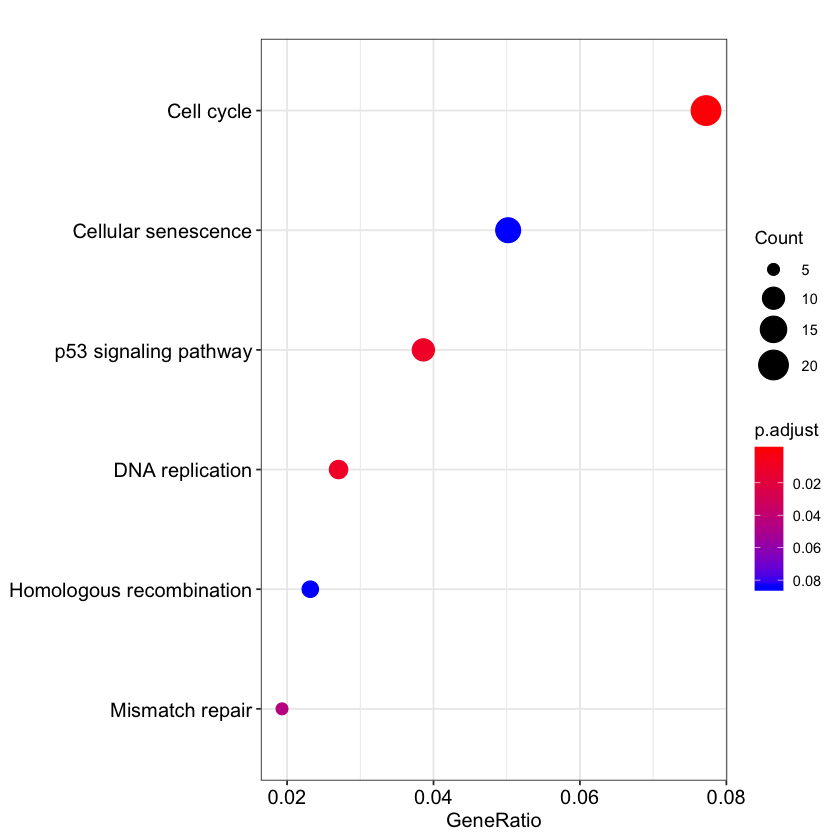

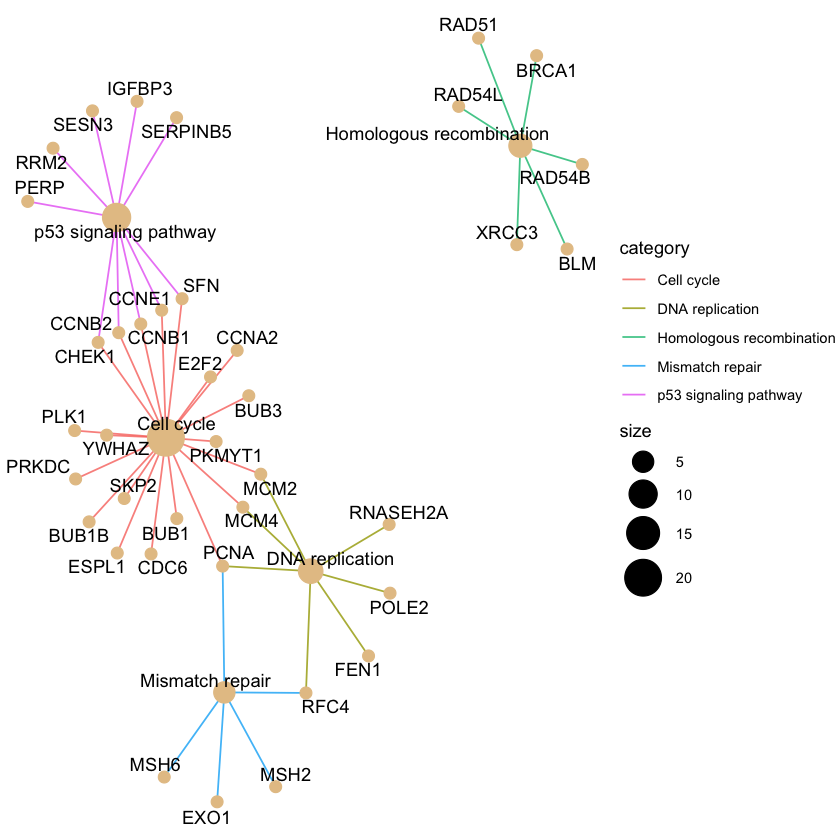

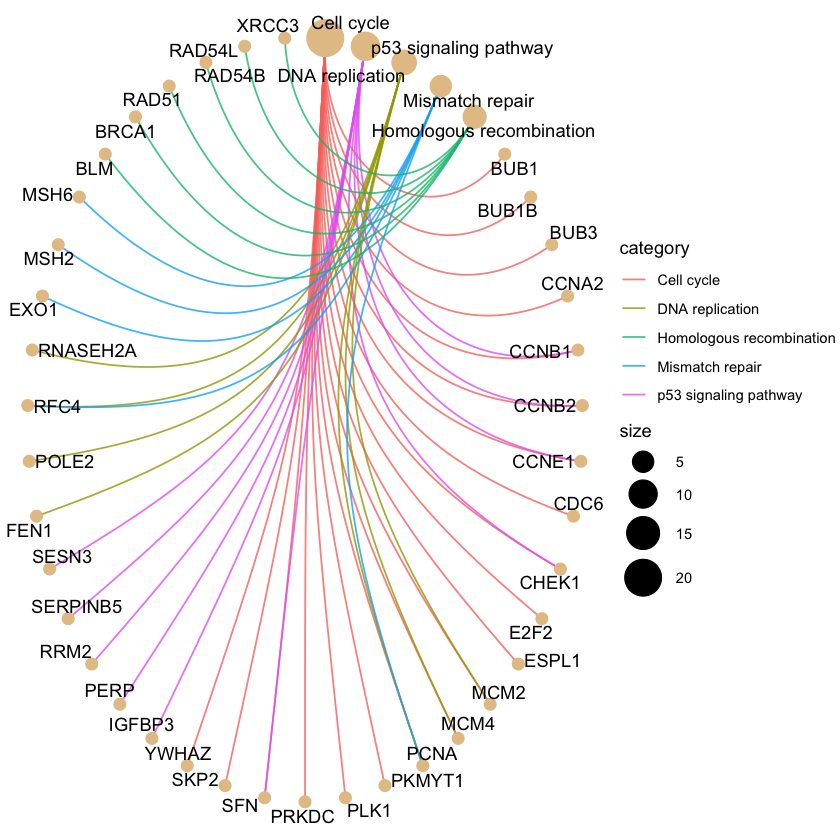

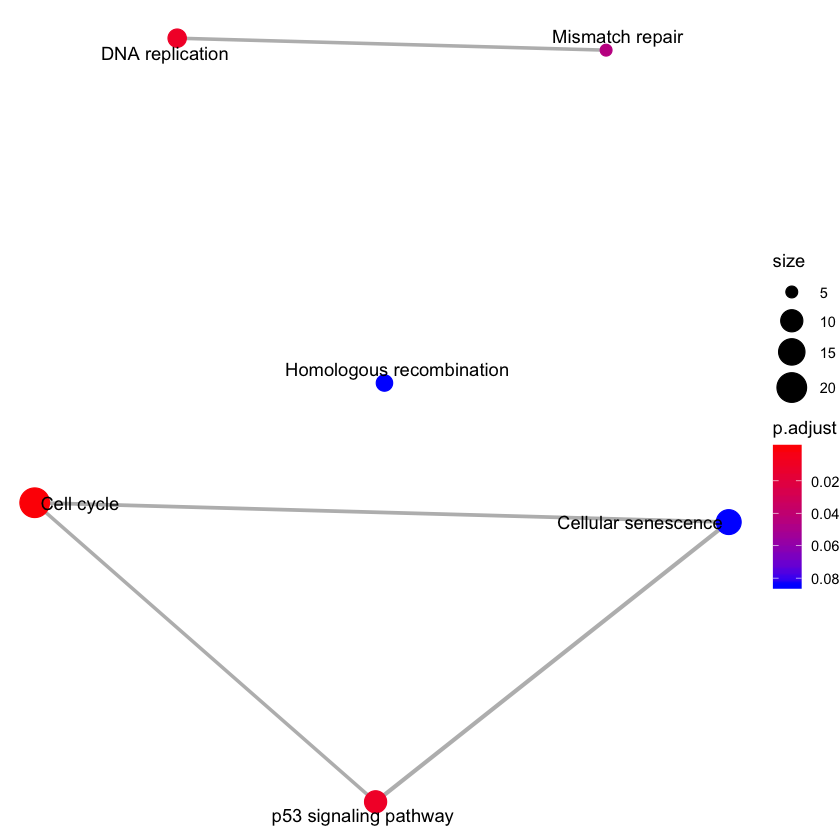

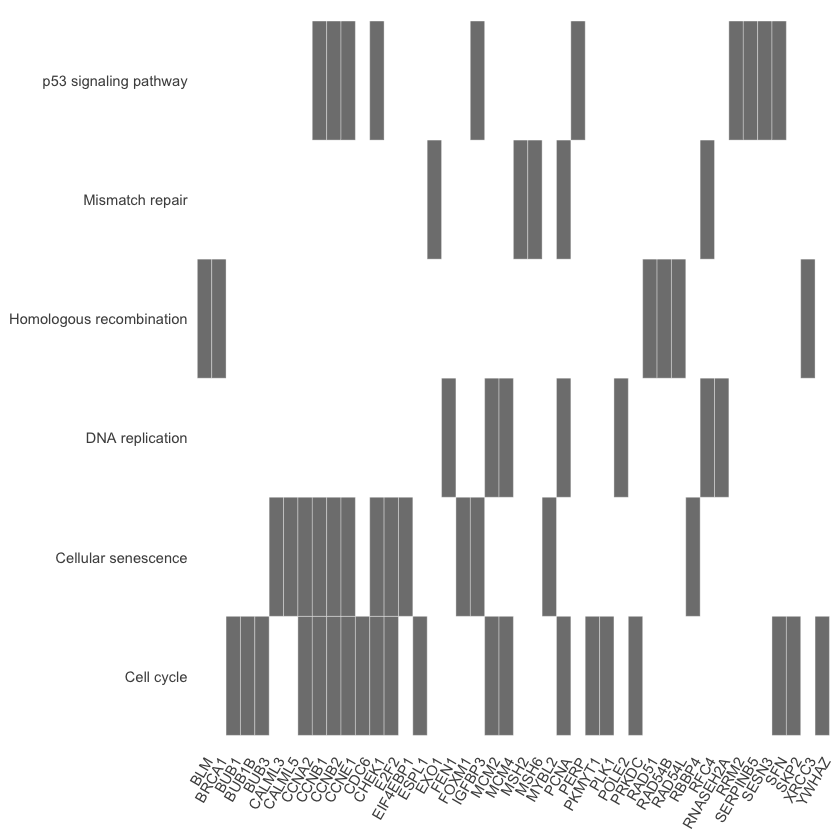

In [25]:
rm(list = ls()) 
options(stringsAsFactors = F)

library(ggplot2)
library(clusterProfiler)
library(org.Hs.eg.db)

load(file = 'deg.Rdata')
head(deg)
load(file = 'anno_DEG.Rdata')

gene_up= DEG[DEG$g == 'UP','ENTREZID'] 
gene_down=DEG[DEG$g == 'DOWN','ENTREZID'] 
gene_diff=c(gene_up,gene_down)
gene_all=as.character(DEG[ ,'ENTREZID'] )
data(geneList, package="DOSE")
head(geneList)
boxplot(geneList)
boxplot(DEG$logFC)

geneList=DEG$logFC
names(geneList)=DEG$ENTREZID
geneList=sort(geneList,decreasing = T)

gene_down
gene_up
enrichKK <- enrichKEGG(gene         =  gene_up,
                      organism     = 'hsa',
                      #universe     = gene_all,
                      pvalueCutoff = 0.1,
                      qvalueCutoff =0.1)
head(enrichKK)[,1:6] 
browseKEGG(enrichKK, 'hsa04512')
dotplot(enrichKK)
enrichKK=DOSE::setReadable(enrichKK, OrgDb='org.Hs.eg.db',keyType='ENTREZID')
enrichKK 

#(3)可视化
#条带图
par(mfrow=c(2,1))
barplot(enrichKK,showCategory=20)
#气泡图
dotplot(enrichKK)
#下面的图需要映射颜色，设置和示例数据一样的geneList
geneList = deg$logFC
names(geneList)=deg$ENTREZID
geneList = sort(geneList,decreasing = T)
#(3)展示top5通路的共同基因，要放大看。
#Gene-Concept Network
cnetplot(enrichKK, categorySize="pvalue", foldChange=geneList,colorEdge = TRUE)
cnetplot(enrichKK, foldChange=geneList, circular = TRUE, colorEdge = TRUE)
#Enrichment Map
emapplot(enrichKK)
#(4)展示通路关系,仅仅是针对于GO数据库结果。
# goplot(enrichKK)
#(5)Heatmap-like functional classification
heatplot(enrichKK,foldChange = geneList)


